In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Let's load all the datasets
data_00 = pd.read_csv("E:\Technolabs\Final-Project\dataset-of-00s.csv")
data_10 = pd.read_csv("E:\Technolabs\Final-Project\dataset-of-10s.csv")
data_60 = pd.read_csv("E:\Technolabs\Final-Project\dataset-of-60s.csv")
data_70 = pd.read_csv("E:\Technolabs\Final-Project\dataset-of-70s.csv")
data_80 = pd.read_csv("E:\Technolabs\Final-Project\dataset-of-80s.csv")
data_90 = pd.read_csv("E:\Technolabs\Final-Project\dataset-of-90s.csv")

#### Let's concatenate all the datasets 

In [3]:
stacked = sorted(glob('dataset-of-*.csv'))

In [4]:
final_data = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in stacked),ignore_index = True)

In [5]:
final_data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,filename
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1,dataset-of-00s.csv
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1,dataset-of-00s.csv
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0,dataset-of-00s.csv
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0,dataset-of-00s.csv
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1,dataset-of-00s.csv


In [6]:
# Renaming the column 'filename' to 'year' for EDA purpose  
final_data.rename({'filename':'year'}, inplace = True, axis = 1)

In [7]:
final_data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'year'],
      dtype='object')

In [8]:
final_data['year'].unique()

array(['dataset-of-00s.csv', 'dataset-of-10s.csv', 'dataset-of-60s.csv',
       'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv'],
      dtype=object)

In [9]:
# Replacing the values within year column to years sccording to the data provided
final_data['year'].replace(['dataset-of-00s.csv', 'dataset-of-10s.csv', 'dataset-of-60s.csv',
       'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv'],['2000','2010','1960','1970','1980','1990'], inplace = True)

In [10]:
final_data.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.1590,0.532,133.061,196707,4,30.88059,13,1,2000
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.1480,0.688,92.988,242587,4,41.51106,10,1,2000
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.1740,0.300,86.964,338893,4,65.32887,13,0,2000
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.1920,0.333,148.440,255667,4,58.59528,9,0,2000
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.1250,0.631,112.098,193760,4,22.62384,10,1,2000
5,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.26800,0.1360,0.969,135.347,192720,4,28.29051,10,0,2000
6,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.365,0.922,1,-2.644,1,0.0710,0.002850,0.00000,0.3210,0.290,77.250,89427,4,45.77202,4,0,2000
7,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.220000,0.00000,0.1930,0.746,124.711,239240,4,35.59732,10,1,2000
8,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.00000,0.0759,0.389,153.105,253640,4,19.65701,11,1,2000
9,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.00000,0.1150,0.344,124.213,314286,3,32.66343,16,0,2000


In [11]:
# Let's see shape of the data
final_data.shape

(41106, 20)

In [12]:
final_data['time_signature'].nunique()

5

In [13]:
# Satistical analysis
final_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599793,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


#### Data exploration

In [14]:
final_data.target.value_counts()

1    20553
0    20553
Name: target, dtype: int64

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

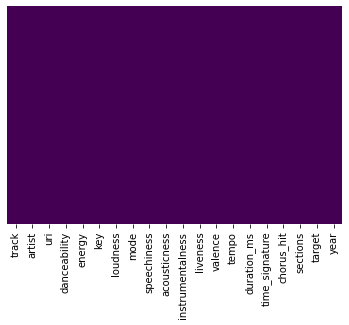

In [16]:
# Null values count
sns.heatmap(final_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# Count of unique values
final_data.nunique()

track               35860
artist              11904
uri                 40560
danceability         1048
energy               1787
key                    12
loudness            16160
mode                    2
speechiness          1346
acousticness         4194
instrumentalness     5122
liveness             1674
valence              1609
tempo               32152
duration_ms         21517
time_signature          5
chorus_hit          39950
sections               84
target                  2
year                    6
dtype: int64

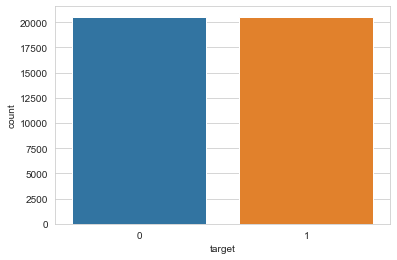

In [18]:
# Target variable visualization
sns.set_style('whitegrid')
sns.countplot(x = 'target',data=final_data)

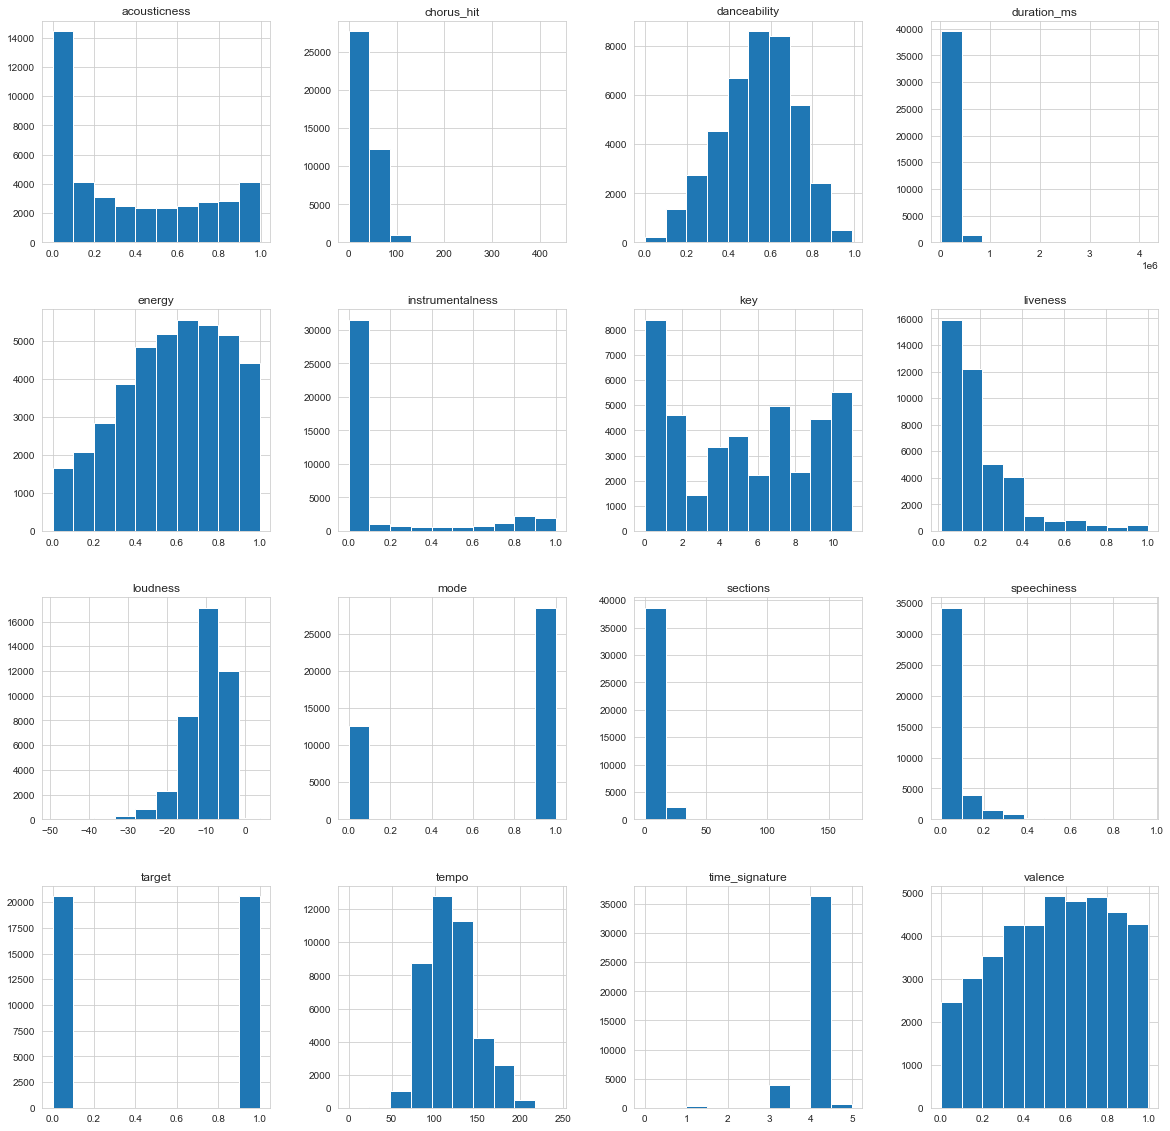

In [19]:
# Histogram 
final_data.hist(figsize=(20,20))
plt.show()

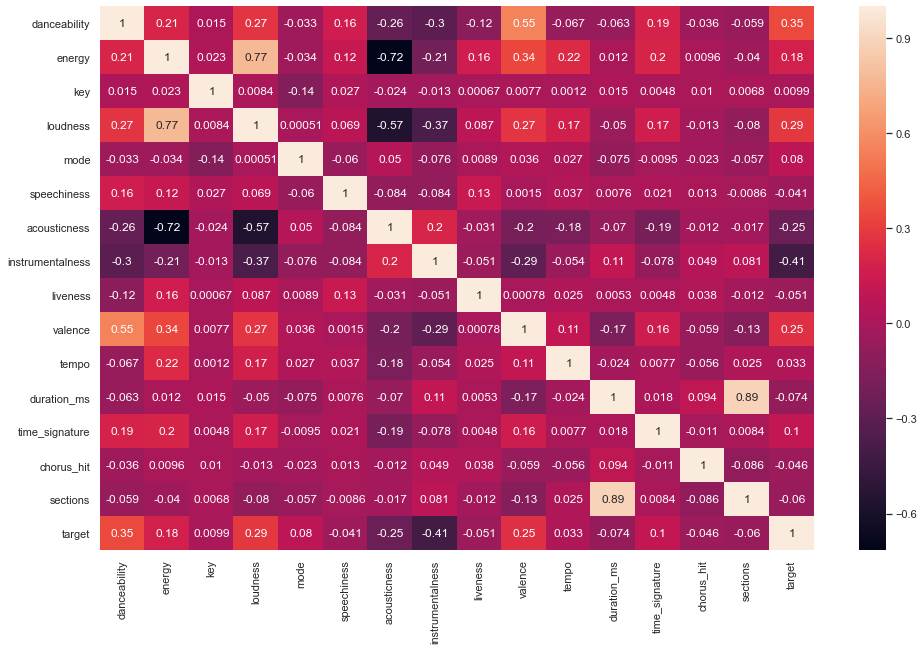

In [20]:
# Correlation plot
plt.figure(figsize=(16,10))
sns.set(style='whitegrid')
corr = final_data.corr()
sns.heatmap(corr,annot=True)

#### Distribution plots for features

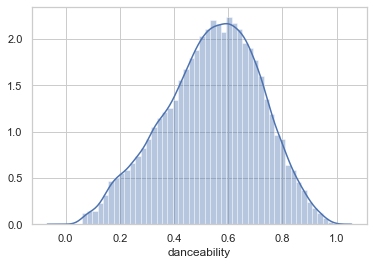

In [21]:
sns.distplot(final_data['danceability'])

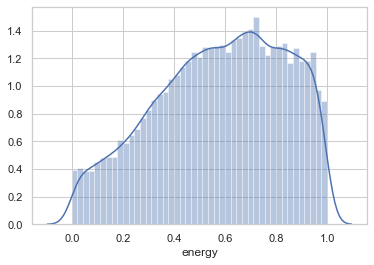

In [22]:
sns.distplot(final_data['energy'])

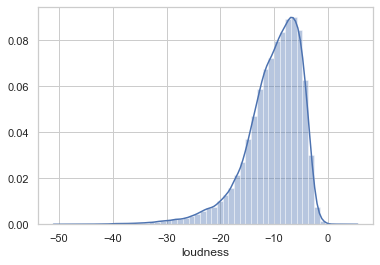

In [23]:
sns.distplot(final_data['loudness'])

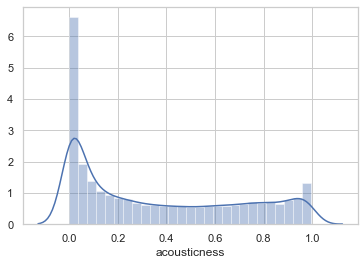

In [24]:
sns.distplot(final_data['acousticness'])

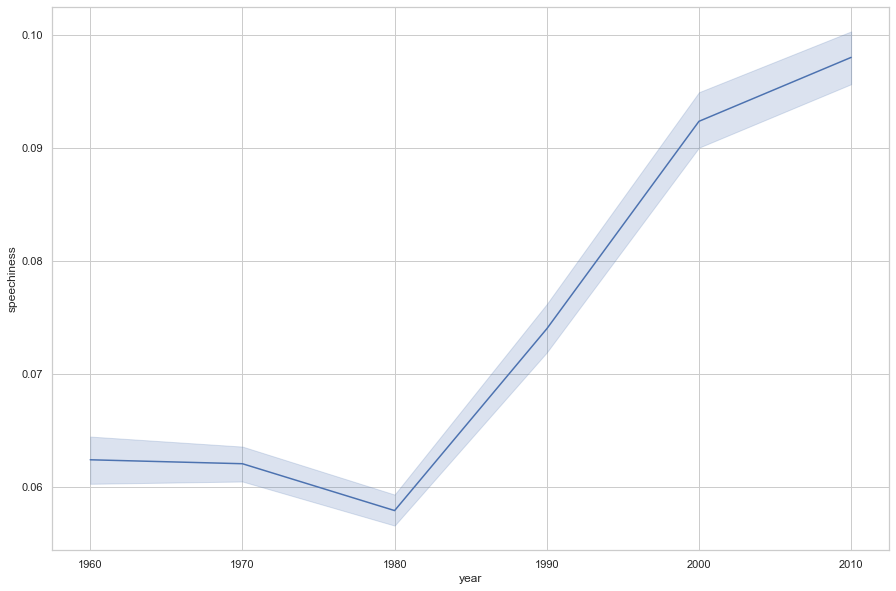

In [25]:
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(x = 'year', y = 'speechiness', data = final_data)

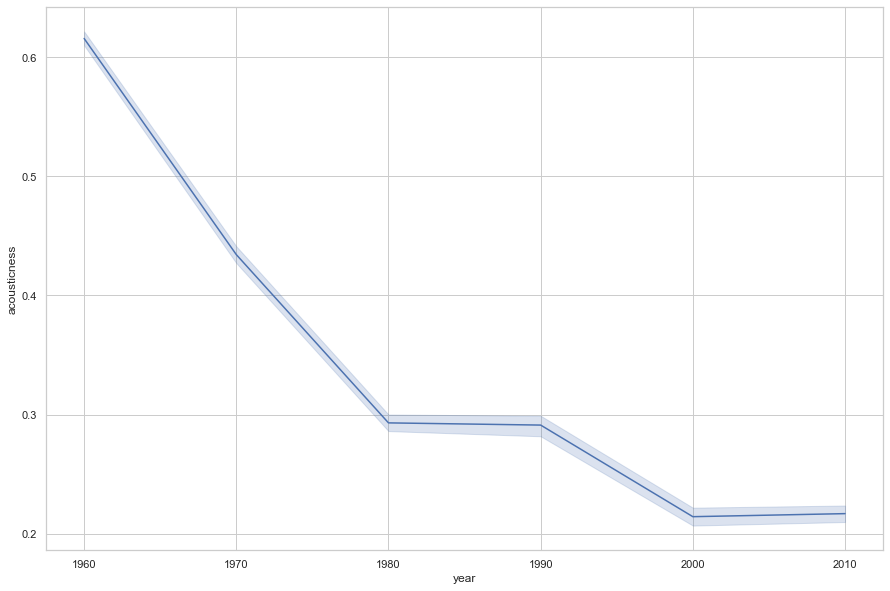

In [26]:
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(x = 'year', y = 'acousticness', data = final_data)

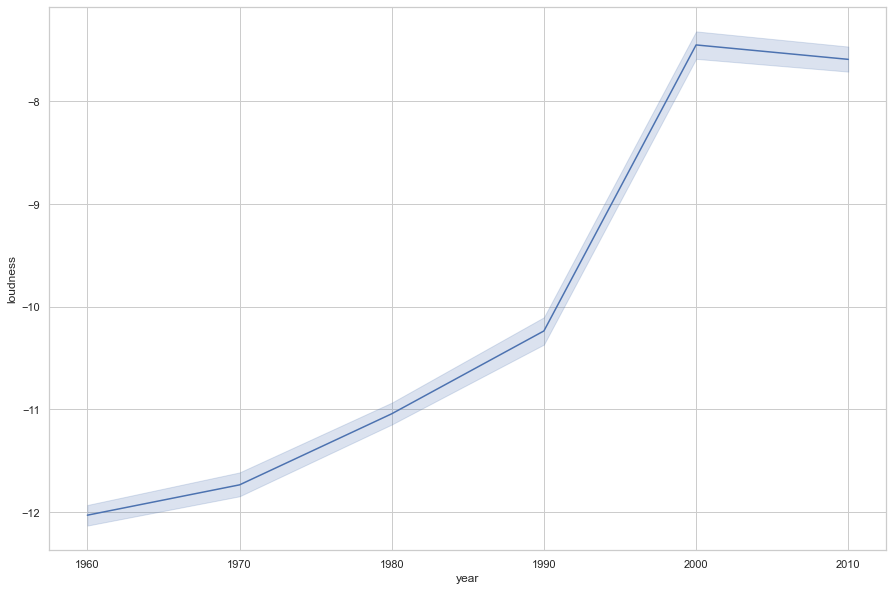

In [27]:
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(x = 'year', y = 'loudness', data = final_data)

In [28]:
# Most energetic song
final_data[final_data.energy == np.max(final_data.energy)]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
29726,Endless Rain,Nataural,spotify:track:3xNMoalU3NRwgcQMfpNnmo,0.131,1.0,0,-13.429,1,0.0403,0.793,0.548,0.963,0.00001,100.661,128615,3,24.89065,8,0,1980
29976,Dripping Rain,Nataural,spotify:track:0TWYYsAFK3Hg2k3rob8mCb,0.154,1.0,7,-10.996,1,0.0827,0.160,0.988,0.891,0.00001,134.026,190334,4,26.65989,10,0,1980
34638,Under Shelter Rain,Nataural,spotify:track:4WjgebiAotVKXyxix0oQRa,0.168,1.0,6,-10.890,0,0.0836,0.139,0.999,0.928,0.00001,113.632,167137,3,22.71794,10,0,1980
34936,Pouring Rain,Nataural,spotify:track:07ILGDMJdj609RqKaoDiVz,0.162,1.0,11,-11.068,0,0.0622,0.124,0.990,0.918,0.00001,82.055,162122,4,31.34900,6,0,1980


In [29]:
# Dancable song
final_data[final_data.danceability == np.max(final_data.danceability)]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
35348,Funky Cold Medina,Tone-Loc,spotify:track:5YIF6HSOtHN9HdcE5IPzMe,0.988,0.633,5,-15.012,0,0.0888,0.0755,0.000002,0.0668,0.929,117.493,248160,4,48.94409,13,1,1980


In [30]:
# Most loudest song
final_data[final_data.duration_ms == np.max(final_data.duration_ms)]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
4282,42 vexations,Dom Pub,spotify:track:60qgoupfzVr4Bccw5U1DAe,0.675,0.00766,11,-32.584,1,0.3,0.996,0.97,0.0994,0.38,130.817,4170227,4,29.46306,169,0,2000


In [31]:
# Most lengthy song
final_data[final_data.loudness == np.max(final_data.loudness)]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
28561,Your Pretty Face Is Going to Hell - Alternate ...,The Stooges,spotify:track:0Aveu2KsriohUafrrerz1F,0.186,0.997,9,3.744,1,0.154,0.000467,0.0202,0.0644,0.107,157.047,294467,4,37.49109,13,0,1970


In [32]:
# Top 10 Dancable songs
final_data[['artist','track','danceability','year']].sort_values('danceability',ascending = False)[0:10]

,artist,track,danceability,year
35348,Tone-Loc,Funky Cold Medina,0.988,1980
2653,Pitbull Featuring Trina & Young Bo$$,Go Girl,0.986,2000
8870,DJ Suede The Remix God,Cash Me Outside (#CashMeOutside),0.981,2010
8262,Glee Cast,Ice Ice Baby,0.980,2010
33104,The Jacksons,State of Shock,0.980,1980
40223,Vanilla Ice,Ice Ice Baby,0.979,1990
31528,Dr. Jeckyll & Mr. Hyde,Butt Naked,0.978,1980
4578,Timbaland Featuring Nelly Furtado & Justin Tim...,Give It To Me,0.978,2000
8897,Ambjaay,Uno,0.978,2010
39846,Barney,Barney Theme Song,0.976,1990


In [33]:
# Top 10 energetic songs
final_data[['artist','track','energy','year']].sort_values('energy',ascending = False)[0:10]

,artist,track,energy,year
29976,Nataural,Dripping Rain,1.000,1980
29726,Nataural,Endless Rain,1.000,1980
34936,Nataural,Pouring Rain,1.000,1980
34638,Nataural,Under Shelter Rain,1.000,1980
5724,Pig Destroyer,Pretty In Casts,0.999,2000
3494,Andrew Spencer,Zombie - Ray Knox Remix Edit,0.999,2000
6072,Invincible Force,Sacrifice,0.999,2010
23430,Crass,They've Got a Bomb,0.999,1970
4200,Baracuda,Ass Up - Ic3m4n Remix Short,0.999,2000
307,The Casualties,Punk Rock Love,0.999,2000


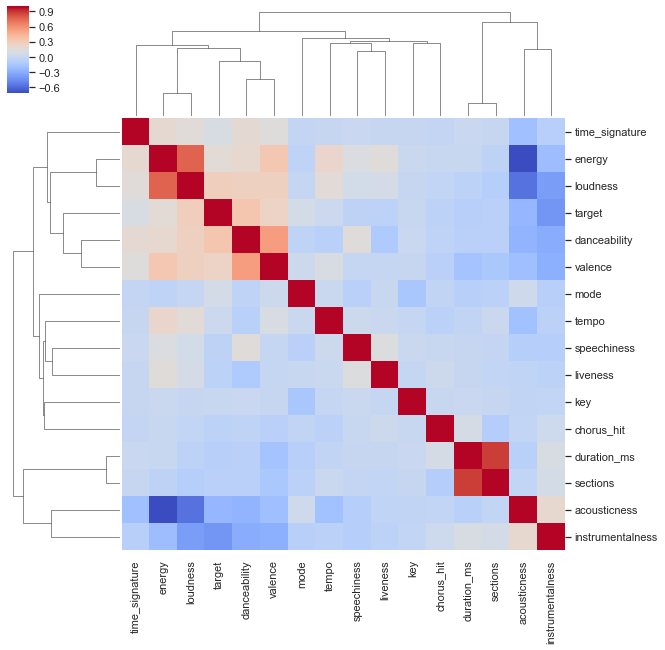

In [34]:
corr = final_data.corr()
sns.clustermap(corr,cmap='coolwarm')

Text(0.5, 0, 'Year')

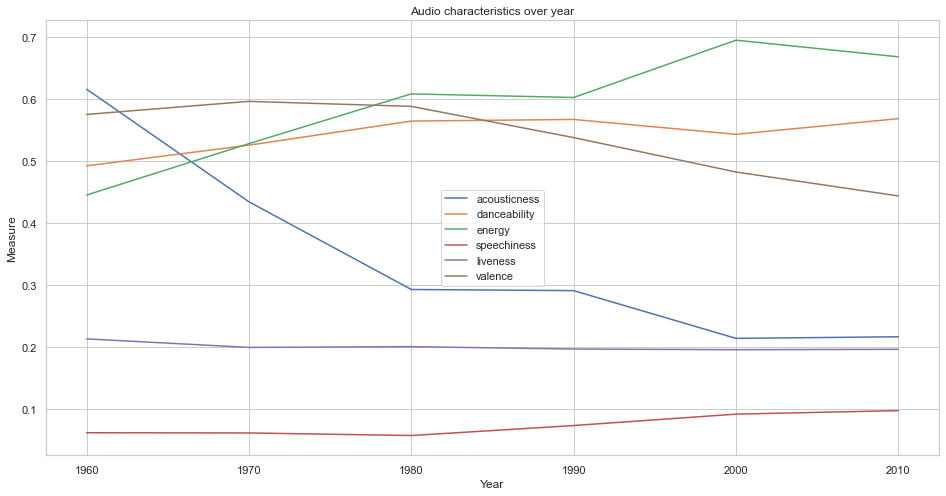

In [35]:
# Comparision of features in a single plot
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = final_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

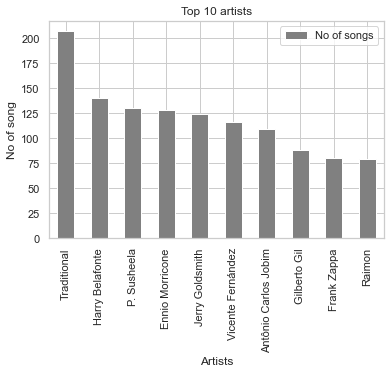

In [36]:
# Top 10 artists
Top10 = pd.DataFrame({'No of songs':final_data['artist'].value_counts().head(10)})
Top10.plot.bar(color='grey')
plt.title('Top 10 artists')
plt.xlabel('Artists')
plt.ylabel('No of song')
plt.show()

#### Data Preprocesing

In [37]:
#  Data Shuffling 
df = final_data.sample(frac=1)
df.tail(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
36093,Rosealia,Better Than Ezra,spotify:track:2NlX2HYLvnqpD8v1sBOUyK,0.392,0.6760,7,-11.914,1,0.0327,0.00567,0.000111,0.1550,0.548,120.926,278973,4,164.10108,5,1,1990
14997,Living Without You,Randy Newman,spotify:track:5o1A41I6NmEVRKVib0Rslo,0.575,0.0722,10,-20.030,1,0.0322,0.78800,0.000000,0.0672,0.356,112.012,143693,4,43.36787,9,0,1960
28199,Georgia Rhythm,Atlanta Rhythm Section,spotify:track:7aV9xwnPgzTWj3yG0nAURt,0.710,0.6070,7,-8.972,1,0.0355,0.41100,0.000005,0.0827,0.524,117.258,293800,4,23.86265,16,1,1970
9267,Esskeetit,Lil Pump,spotify:track:44KKhCyI0BGS6LvVyDqJtH,0.934,0.5050,11,-7.648,1,0.1680,0.02290,0.000000,0.0867,0.691,139.930,181714,4,69.02425,8,1,2010
23626,Twer Nyame,Ebo Taylor,spotify:track:6U7anU6xaWnDMJ10sensQy,0.708,0.7520,10,-7.169,1,0.0818,0.66400,0.641000,0.0858,0.792,116.272,1012053,4,42.09646,43,0,1970


In [38]:
# Let's drop the columns
df.drop(['track','artist','uri','year'],axis = 1, inplace = True)

In [39]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [40]:
# Seperating independent and dependent values
features = df.iloc[:,0:-1]
Target = df.iloc[:,-1]

In [41]:
from sklearn import preprocessing

In [42]:
# Scale the features for better accuracy
scaled_features = preprocessing.scale(features)

In [43]:
# Let's take a '0'th index
samples = scaled_features.shape[0]
samples

41106

Splitting 80%, 10%, 10% for train, validation, test set

In [44]:
train_samples = int(0.8*samples)
validate_samples = int(0.1*samples)
test_samples = samples-train_samples-validate_samples

In [45]:
# train
train_inputs = scaled_features[:train_samples]
train_targets = Target[:train_samples]

In [46]:
# Validation
validate_inputs = scaled_features[:validate_samples]
validate_targets = Target[:validate_samples]

In [47]:
# Test
test_inputs = scaled_features[train_samples+validate_samples:]
test_targets = Target[train_samples+validate_samples:]

In [48]:
print(train_inputs.shape)
print(train_targets.shape)
print(validate_inputs.shape)
print(validate_targets.shape)
print(test_inputs.shape)
print(test_targets.shape)

(32884, 15)
(32884,)
(4110, 15)
(4110,)
(4112, 15)
(4112,)


In [49]:
# Let's print the proportion of the data
print(np.sum(train_targets), train_samples, np.sum(train_targets) / train_samples)
print(np.sum(validate_targets), validate_samples, np.sum(validate_targets) / validate_samples)
print(np.sum(test_targets), test_samples, np.sum(test_targets) / test_samples)

16455 32884 0.5003953290353972
2014 4110 0.49002433090024333
2046 4112 0.497568093385214


In [ ]:
# Let's save this data for future analysis
np.savez("Spotify_train_data_stacked",inputs = train_inputs, targets = train_targets)
np.savez("Spotify_validate_data_stacked",inputs = validate_inputs, targets = validate_targets)
np.savez("Spotify_test_data_stacked",inputs = test_inputs, targets = test_targets)

In [50]:
# Extracting data that we have saved
npz = np.load("Spotify_train_data_stacked.npz")

# All values are floats so
train_inputs = npz['inputs'].astype(np.float)
# We know target values are of int
train_targets = npz['targets'].astype(np.int)

In [51]:
# Let's also load validation and test data
npz = np.load("Spotify_validate_data_stacked.npz")
validate_inputs, validate_targets = npz['inputs'].astype(np.float),npz['targets'].astype(np.int)

npz = np.load("Spotify_test_data_stacked.npz")
test_inputs, test_targets = npz['inputs'].astype(np.float),npz['targets'].astype(np.int)

#### Model building Sequential NN

In [52]:
import tensorflow as tf

In [53]:
input_size = 15
output_size = 2

hidden_layer_size = 50

model = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
            tf.keras.layers.Dense(output_size,activation='softmax')
])

In [54]:
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
batch_size = 300
max_epochs = 6

history = model.fit(
                    train_inputs,
                    train_targets,
                    batch_size = batch_size,
                    epochs = max_epochs,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(validate_inputs,validate_targets),
                    verbose = 2
            )

Epoch 1/6
110/110 - 1s - loss: 0.5264 - accuracy: 0.7292 - val_loss: 0.4772 - val_accuracy: 0.7686
Epoch 2/6
110/110 - 0s - loss: 0.4885 - accuracy: 0.7613 - val_loss: 0.4625 - val_accuracy: 0.7745
Epoch 3/6
110/110 - 0s - loss: 0.4778 - accuracy: 0.7688 - val_loss: 0.4545 - val_accuracy: 0.7827
Epoch 4/6
110/110 - 0s - loss: 0.4714 - accuracy: 0.7737 - val_loss: 0.4502 - val_accuracy: 0.7891
Epoch 5/6
110/110 - 0s - loss: 0.4662 - accuracy: 0.7763 - val_loss: 0.4476 - val_accuracy: 0.7876
Epoch 6/6
110/110 - 0s - loss: 0.4630 - accuracy: 0.7790 - val_loss: 0.4490 - val_accuracy: 0.7852


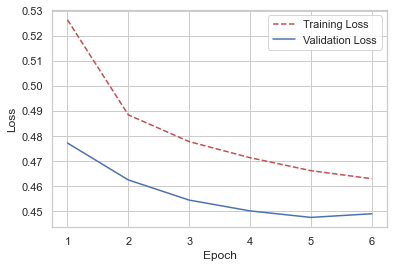

In [56]:
loss = history.history['loss']
val_loss = history.history['val_loss']
                           
epochs_count = range(1, len(loss)+1)

plt.plot(epochs_count, loss, 'r--')
plt.plot(epochs_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [57]:
model.fit(train_inputs,train_targets,epochs = 10)

Epoch 1/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.4717 - accuracy: 0.7731
Epoch 2/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.4618 - accuracy: 0.7793
Epoch 3/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.4572 - accuracy: 0.7818
Epoch 4/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.4533 - accuracy: 0.7841
Epoch 5/10
1028/1028 [==============================] - ETA: 0s - loss: 0.4499 - accuracy: 0.78 - 2s 2ms/step - loss: 0.4500 - accuracy: 0.7860
Epoch 6/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.4467 - accuracy: 0.7887
Epoch 7/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.4450 - accuracy: 0.7876
Epoch 8/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.4415 - accuracy: 0.7902
Epoch 9/10
1028/1028 [==============================] - 2s 2ms/step - loss: 0.4392 - accuracy: 0.7930
Epoch 10/10
1028/1028 [=================

In [58]:
test_loss, test_acc = model.evaluate(test_inputs, test_targets)

129/129 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7806


In [59]:
prob_model = tf.keras.Sequential([model,
                                 tf.keras.layers.Softmax()])

In [60]:
classifications = prob_model.predict(test_inputs)
classifications[0]

array([0.3587279 , 0.64127207], dtype=float32)

#### Model building Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier()

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(features,Target,test_size = 0.2,random_state = 0)

In [65]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
predictions = dt.predict(x_test)

In [67]:
predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
from sklearn import metrics

In [69]:
print("accuracy : ",metrics.accuracy_score(y_test,predictions))

accuracy :  0.7049379712965216


#### Model building RandomForest

In [70]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [71]:
features = ['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','target']

In [72]:
df2 = df[features]

In [73]:
df2.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,target
30817,0.552,0.704,-7.143,0.1130,0.623000,0.000000,0.1100,0.619,135.535,238053,0
38525,0.469,0.458,-13.583,0.0388,0.102000,0.236000,0.0908,0.107,123.932,337600,0
28270,0.677,0.611,-9.900,0.0330,0.454000,0.907000,0.1630,0.410,102.966,95973,0
19929,0.675,0.559,-10.136,0.0434,0.759000,0.002270,0.0721,0.924,142.763,129000,1
19500,0.572,0.710,-7.081,0.0299,0.079600,0.000008,0.2270,0.967,131.088,221867,1
4464,0.549,0.873,-7.202,0.0389,0.011400,0.000028,0.3520,0.759,120.064,230880,1
15569,0.273,0.225,-13.690,0.0330,0.902000,0.000030,0.1540,0.246,72.588,188493,1
6810,0.659,0.623,-2.253,0.0451,0.066700,0.000000,0.5820,0.439,88.042,181824,1
2591,0.172,0.557,-8.790,0.0313,0.000698,0.658000,0.1870,0.414,82.472,220000,0
14799,0.620,0.525,-8.002,0.0417,0.727000,0.000009,0.5040,0.796,130.370,140747,1


In [78]:
# Seperating independent and dependent values
features = df2.iloc[:,0:-1]
target = df2.iloc[:,-1]

In [80]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state = 0)

In [86]:
print(x_train.shape)

(32884, 10)


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier(n_estimators = 100)

In [83]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
pred = rf.predict(x_test)

In [85]:
print("accuracy: ",metrics.accuracy_score(y_test,pred))

accuracy:  0.7884942836292873


In [87]:
import joblib
joblib.dump(rf,"Link.pkl")

['Link.pkl']